<a href="https://www.kaggle.com/code/harshdeepsinghhnspl/space-titanic?scriptVersionId=255265090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

In [3]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
sns.heatmap(train.isnull())

In [ ]:
sns.heatmap(test.isnull())

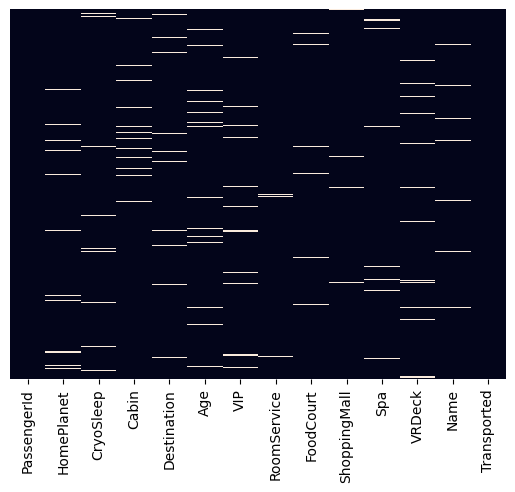

In [12]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

<Axes: xlabel='HomePlanet', ylabel='count'>

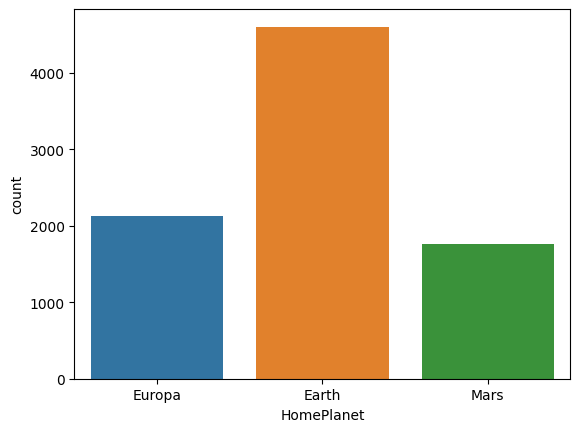

In [13]:
sns.countplot(x='HomePlanet', data=train)

<Axes: xlabel='CryoSleep', ylabel='count'>

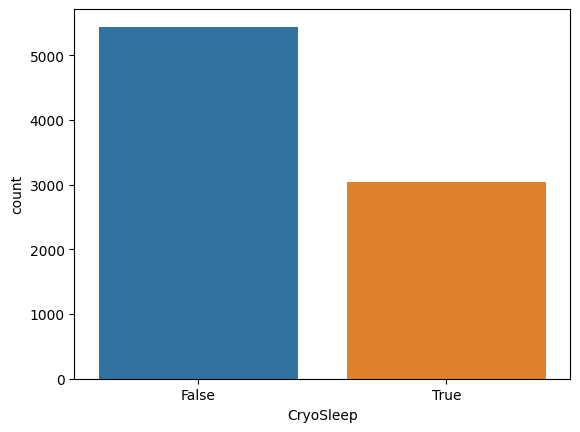

In [14]:
sns.countplot(x='CryoSleep', data=train)

<Axes: xlabel='Destination', ylabel='count'>

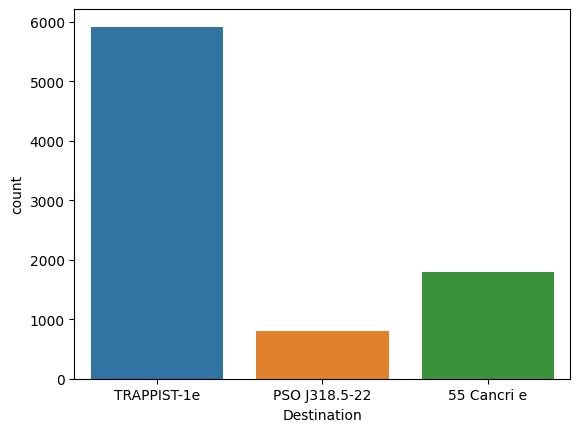

In [15]:
sns.countplot(x='Destination', data=train)

<Axes: xlabel='VIP', ylabel='count'>

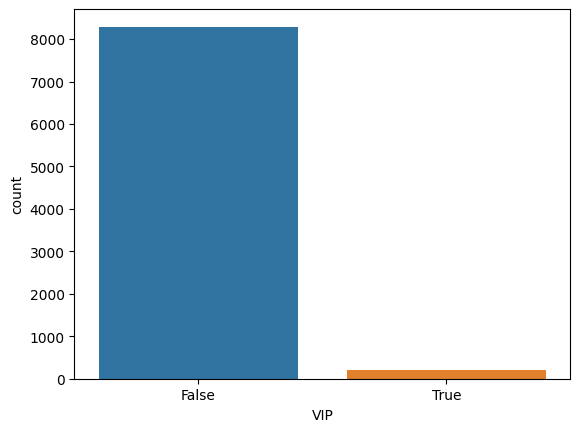

In [16]:
sns.countplot(x='VIP', data=train)

<Axes: xlabel='Age', ylabel='count'>

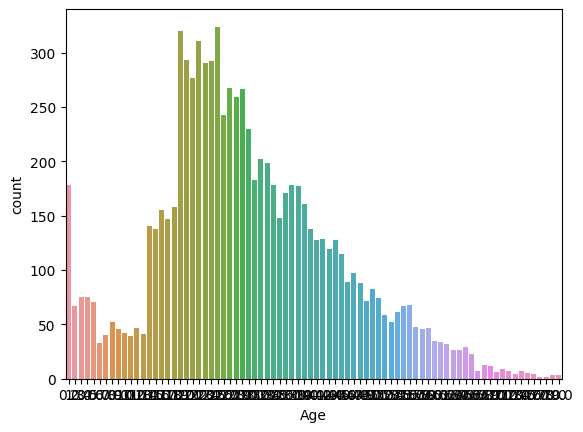

In [17]:
sns.countplot(x='Age', data=train)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

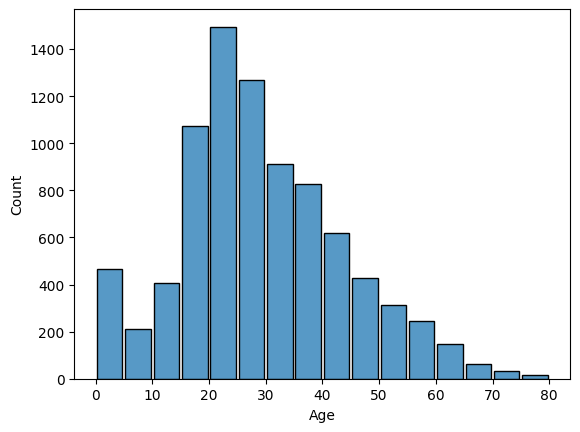

In [18]:
sns.histplot(data=train, x="Age", binwidth=5, shrink=0.9)

<Axes: xlabel='Transported', ylabel='count'>

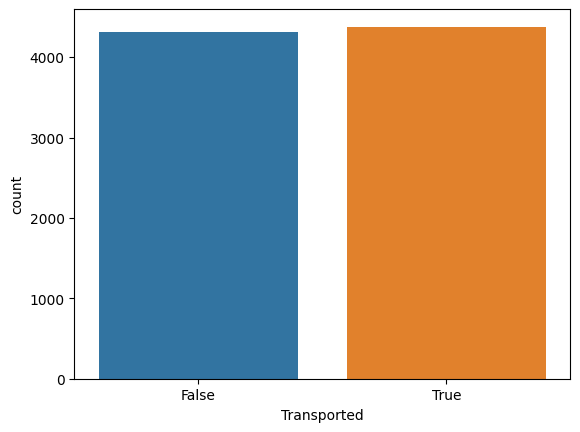

In [19]:
sns.countplot(x='Transported', data=train)

<Axes: xlabel='Destination', ylabel='count'>

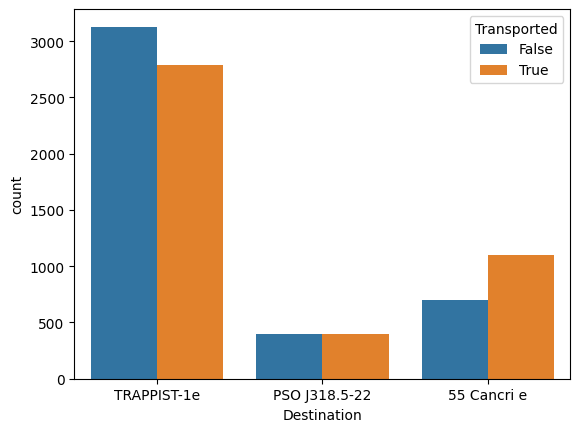

In [20]:
sns.countplot(x="Destination", hue="Transported", data=train)

<Axes: xlabel='HomePlanet', ylabel='count'>

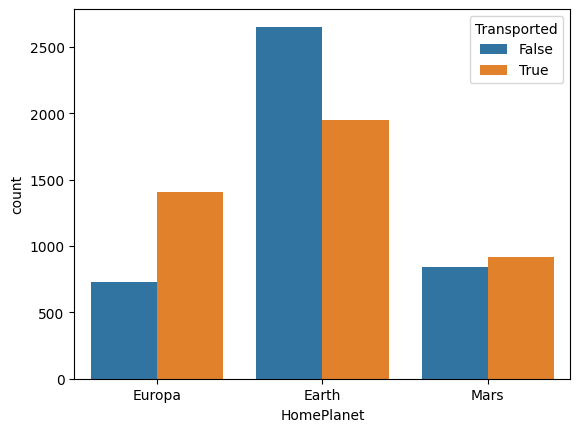

In [21]:
sns.countplot(x="HomePlanet", hue="Transported", data=train)

<Axes: xlabel='CryoSleep', ylabel='count'>

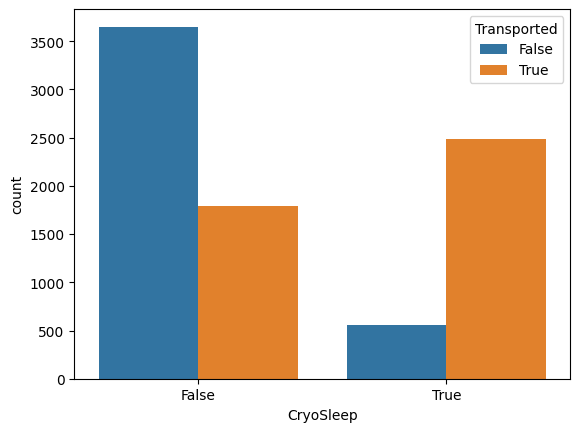

In [22]:
sns.countplot(x="CryoSleep", hue="Transported", data=train)

<Axes: xlabel='VIP', ylabel='count'>

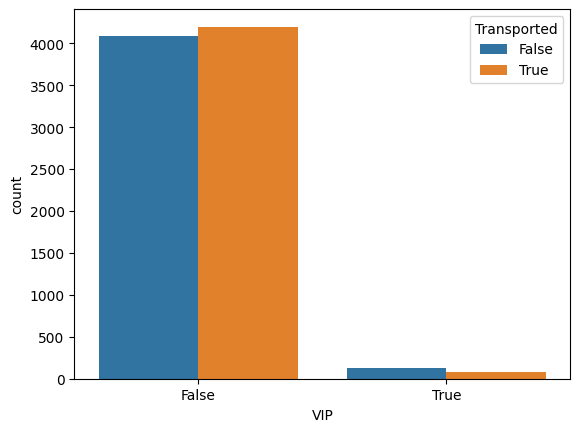

In [23]:
sns.countplot(x="VIP", hue="Transported", data=train)

In [24]:
train.drop(['PassengerId','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1,inplace=True)
#axis = 1 for columns
#Dropping all data which are not in use for now

In [25]:
#Dropping Null Rows
train = train.dropna()

In [26]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True


In [27]:
train_encoded = train.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' or x.dtype == 'bool' else x)
train_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,0,0,0,39.0,0,0
1,1,0,0,24.0,0,1
2,0,0,0,58.0,1,0
3,0,0,0,33.0,0,0
4,1,0,0,16.0,0,1


In [28]:
#Currently using train dataset for X and y for easilness
X = train_encoded.drop('Transported', axis=1)
y = train_encoded['Transported']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1162
           1       0.81      0.58      0.67      1162

    accuracy                           0.72      2324
   macro avg       0.74      0.72      0.71      2324
weighted avg       0.74      0.72      0.71      2324

[[1001  161]
 [ 493  669]]


<Axes: >

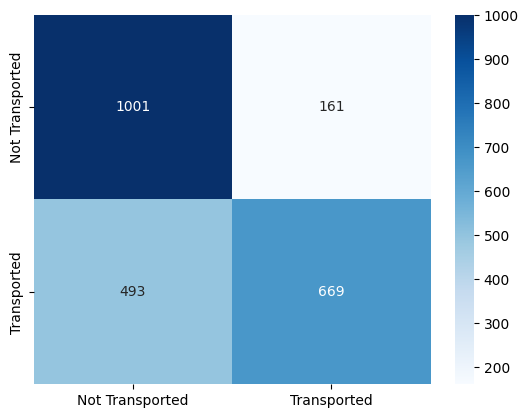

In [34]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])

In [35]:
#How accurate the above stuff is? (Already done above)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7185886402753873


In [36]:
#KAGGLE SUBMISSION PROCESS
'''
1) MAKING SURE FOR THE SAME ENCODINGS IN TEST WHICH WAS USED IN PREDICTIONS
2) THEN ADDING THE STATUS OF TRANSPORTED TO Submission.csv
'''
from sklearn.preprocessing import LabelEncoder

# Columns to process (exclude target column)
feature_cols = [col for col in train.columns if col != 'Transported']

# ----- HANDLE MISSING VALUES -----
for col in feature_cols:
    if train[col].dtype == 'object' or train[col].dtype == 'bool':
        # Fill categorical NaNs with most frequent value from train
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)
        test[col] = test[col].fillna(mode_val)
    else:
        # Fill numeric NaNs with median from train
        median_val = train[col].median()
        train[col] = train[col].fillna(median_val)
        test[col] = test[col].fillna(median_val)

# ----- TRAIN ENCODING -----
train_encoded = train.copy()
label_encoders = {}

for col in train.columns:
    if train[col].dtype == 'object' or train[col].dtype == 'bool':
        le = LabelEncoder()
        train_encoded[col] = le.fit_transform(train[col].astype(str))
        label_encoders[col] = le

/tmp/ipykernel_426/2773974550.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(mode_val)
/tmp/ipykernel_426/2773974550.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(mode_val)


In [37]:
# ----- TEST ENCODING -----
passenger_ids = test['PassengerId']

test.drop(['PassengerId','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'],axis=1,inplace=True)

test_encoded = test.copy()
for col, le in label_encoders.items():
    if col in test_encoded.columns:
        test_encoded[col] = le.transform(test_encoded[col].astype(str))

# Predict
y_pred = logmodel.predict(test_encoded)

# ----- SUBMISSION -----
submission = pd.DataFrame({
    'PassengerId': passenger_ids, 
    'Transported': y_pred
})
submission.to_csv('submission.csv', index=False)